# Google Colab을 이용한 YOLOv3tiny 커스텀 데이터 학습하기

---


* 본 프로그램은 colab에서 yolov3tiny를 custom 하기 위한 코드이다.
* YOLO 형식의 학습데이터 파일들(darknet/data/imges/*.jpg, *.txt)이 있다고 전제한다.
* 학습/테스트/검증 데이터 리스트 파일(darknet/data/list/train.txt, test.txt, valid.txt)이 있다고 전제한다.
* 모델에 쓰일 모든 자료의 위치 정보 파일(darknet/data/hands.data)이 있다고 전제한다.
* 식별 클래스명에 대한 파일이 있다고(darknet/data/hands.names) 전제한다.

참고사이트
* https://hipolarbear.tistory.com/39?category=976588
* https://velog.io/@hannah0125/Google-Colab%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-YOLOv3-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0

##1. 준비과정

a. 시작 전에 Colab이 GPU를 사용할 수 있도록 설정하자.

b. darknet.zip 파일을 google drive에 업로드

In [1]:
# 나의 Colab drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# darknet.zip 압축파일을 풀기. 사전에 MyDrive > Colab Notebooks 경로에 darknet.zip이 있어야 함.
%cd /content
!rm -rf ./darknet
!unzip "/content/drive/MyDrive/darknet.zip" -d "/content/drive/MyDrive/darknet/"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/102_6.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/102_7.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_0.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_1.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_2.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_3.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_4.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_5.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_6.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/103_7.png  
  inflating: /content/drive/MyDrive/darknet/build/darknet/x64/data/labels/104_0.png  
  inflating: /cont

##2. darknet 실행파일 만들기

In [3]:
# Makefile을 수정
%cd /content/drive/MyDrive/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
#!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
#!sed -i 's/LIBSO=0/LIBSO=1' Makefile

/content/drive/MyDrive/darknet


In [4]:
# 수정내용 확인
!head Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=1
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [5]:
# 실행파일 만들기위한 make
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning:

In [6]:
# 실행모드 설정
!chmod +x ./darknet
!./darknet

usage: ./darknet <function>


##3. 데이터셋 다운

In [3]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4aa3409424dd4159aa539275d75d8b82a47e22bc0d73f6ba3723030ce272f690
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

In [1]:
%cd /content/drive/MyDrive/darknet
from roboflow import Roboflow
rf = Roboflow(api_key="8PhA82ZW1Xy3iucGZNKh")
project = rf.workspace("chamwae").project("glasswort-1")
dataset = project.version(2).download("darknet")

/content/drive/MyDrive/darknet
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Glasswort-1-2 in darknet:: 100%|██████████| 231/231 [00:49<00:00,  4.69it/s]


In [1]:
#Set up training file directories for custom dataset
%cd C:/Users/koll2/OneDrive/summer_program_2023/day_18_230803/darknet
%cp {dataset.location}/train/_darknet.labels data/obj.names
%mkdir data/obj
#copy image and labels
%cp {dataset.location}/train/*.jpg data/obj/
%cp {dataset.location}/valid/*.jpg data/obj/

%cp {dataset.location}/train/*.txt data/obj/
%cp {dataset.location}/valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 1\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/test.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/test') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

C:\Users\koll2\OneDrive\summer_program_2023\day_18_230803\darknet


UsageError: Line magic function `%cp` not found.


##4. 학습하기 위한 환경 설정

In [3]:
# 사전 학습된 yolov3-tiny 가중치 파일 다운로드
%cd /content/drive/MyDrive/darknet
!wget http://pjreddie.com/media/files/darknet53.conv.74

/content/drive/MyDrive/darknet
--2023-08-03 01:34:07--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2023-08-03 01:34:08--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  46.5MB/s    in 3.3s    

2023-08-03 01:34:11 (46.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [10]:
# 윈도우 파일을 UNIX 모드 파일로 변경
%cd /content/drive/MyDrive/darknet
!sudo apt install dos2unix
!dos2unix ./data/train.txt
!dos2unix ./data/valid.txt
!dos2unix ./data/test.txt
!dos2unix ./data/obj.names
!dos2unix ./data/obj.data
!dos2unix ./cfg/yolov3-tiny6.cfg

/content/drive/MyDrive/darknet
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dos2unix is already the newest version (7.4.2-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/valid.txt to Unix format...
dos2unix: converting file ./data/test.txt to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./cfg/yolov3-tiny6.cfg to Unix format...


In [11]:
# 학습결과를 보기 위한 함수 정의
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

##4. 학습

In [12]:
# 학습
%cd /content/drive/MyDrive/darknet
!time ./darknet detector train data/obj.data cfg/yolov3-tiny6.cfg darknet53.conv.74 -dont_show -map l tee train.log

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 1030878, rewritten_bbox = 5.440217 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.637019), count: 33, class_loss = 4.545610, iou_loss = 2.067872, total_loss = 6.613482 
 total_bbox = 1030911, rewritten_bbox = 5.440140 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.664199), count: 34, class_loss = 2.956571, iou_loss = 2.076152, total_loss = 5.032723 
 total_bbox = 1030945, rewritten_bbox = 5.440251 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss =

In [13]:
# 학습과정 로그파일을 Mydrive에 저장
%cd /content/drive/MyDrive/darknet
!cp -r train.log ./backup

/content/drive/MyDrive/darknet


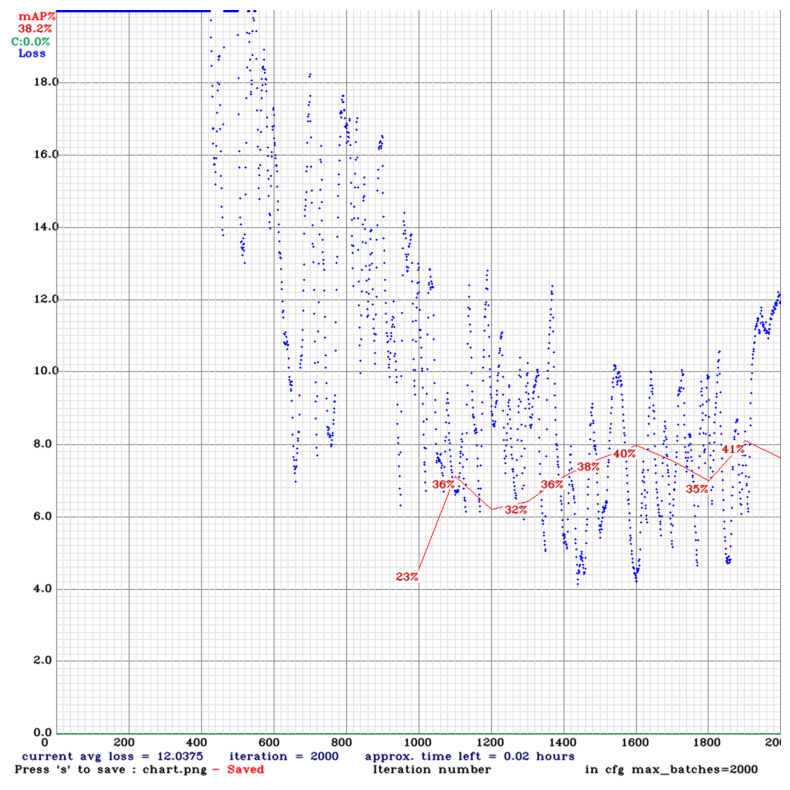

In [14]:
# 학습결과 그래프 보기
imShow('chart.png')

##5. 테스트

In [15]:
# 테스트 데이터를 통한 검증
!time ./darknet detector test data/obj.data cfg/yolov3-tiny6.cfg backup/yolov3-tiny6_final.weights -dont_show -ext_output <data/test.txt> result.txt
download('result.txt')

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 실 데이터를 활용한 검증
!time ./darknet detector test data/obj.data cfg/yolov3-tiny6.cfg backup/yolov3-tiny6_best.weights data/<'sample 이미지 경로'>

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

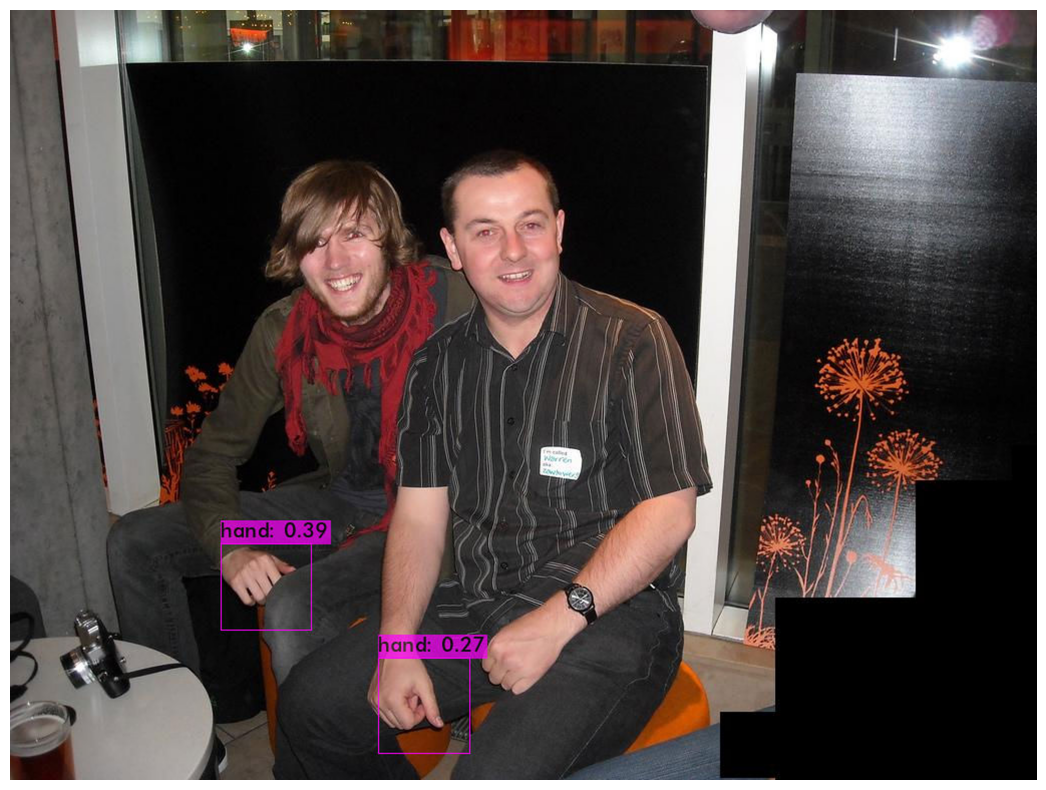

In [ ]:
imShow('predictions.jpg')

##6. 추가학습

In [ ]:
# 추가 학습
!time ./darknet detector train data/obj.data cfg/yolov3-tiny6.cfg backup/yolov3-tiny6_best.weights -dont_show -map l tee retrain.log
!cp retrain.log /content/drive/MyDrive/darknet/backup

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 12

In [ ]:
!time ./darknet detector test data/obj.data cfg/yolov3-tiny6.cfg backup/yolov3-tiny6_best.weights data/<'sample 이미지 경로'>

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

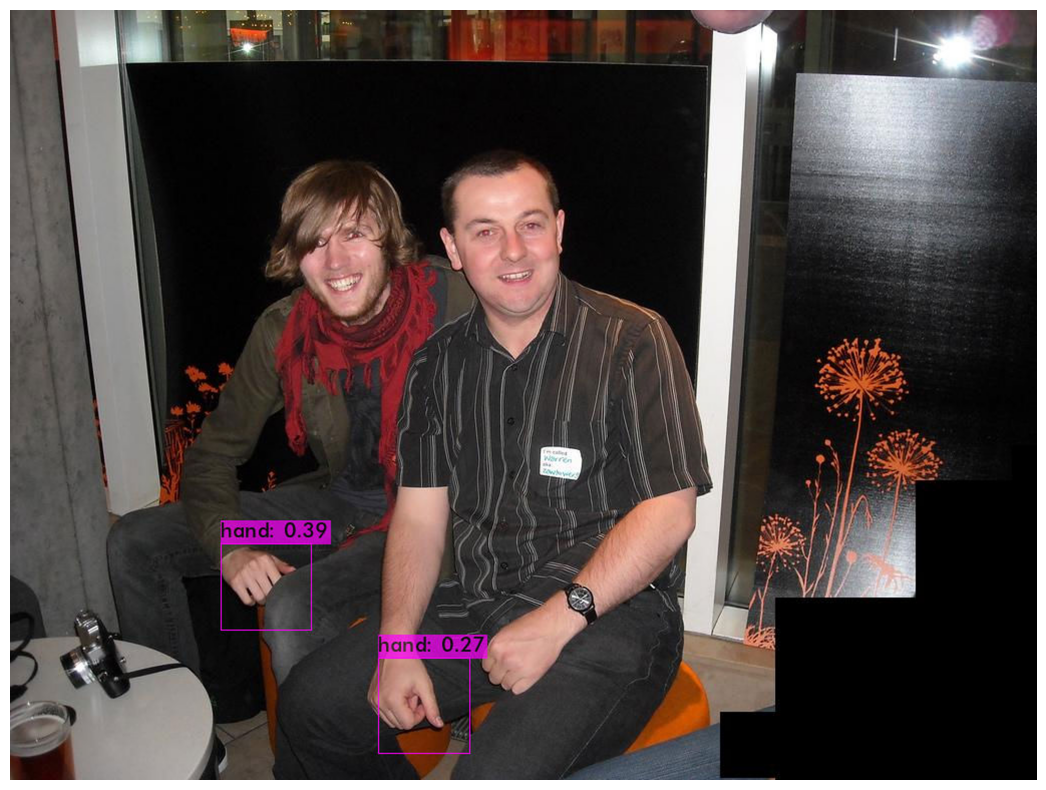

In [ ]:
imShow('predictions.jpg')